Data Details:

Gender: Gender
Age: Age
Height : in metres
Weight : in kgs
family_history : Has a family member suffered or suffers from overweight?
FAVC : Do you eat high caloric food frequently?
FCVC : Do you usually eat vegetables in your meals?
NCP : How many main meals do you have daily?
CAEC : Do you eat any food between meals?
SMOKE : Do you smoke?
CH2O : How much water do you drink daily?
SCC : Do you monitor the calories you eat daily?
FAF: How often do you have physical activity?
TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
CALC : How often do you drink alcohol?
MTRANS : Which transportation do you usually use?

Obesity_level (Target Column) : Obesity level

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [332]:
df = pd.read_csv('https://bitbucket.org/sjakhtar/obesity/raw/f5344641f03d70c19de360fd2efff9c8f8e2f9a1/obesity_dataset')

In [333]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             1903 non-null   float64
 2   Height          1903 non-null   float64
 3   Weight          1903 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            1903 non-null   float64
 7   NCP             1903 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            1903 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             1903 non-null   float64
 13  TUE             1903 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

<Axes: >

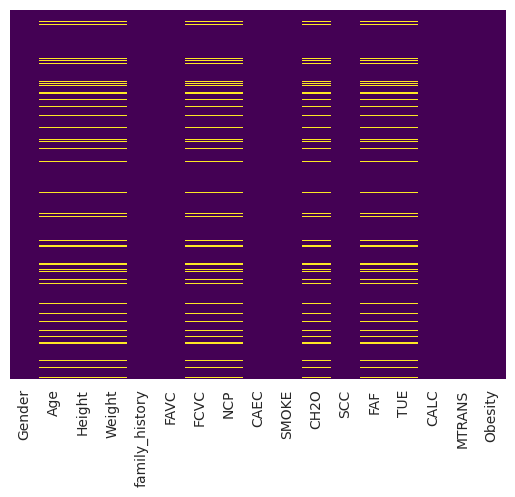

In [335]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [336]:
df.isnull().sum()

,0
Gender,0
Age,208
Height,208
Weight,208
family_history,0
FAVC,0
FCVC,208
NCP,208
CAEC,0
SMOKE,0


In [337]:
# numeric_cols = df.select_dtypes(include=np.number).columns
# df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)

In [338]:
# df = df.fillna(method='bfill')
# df = df.fillna(method='ffill')
df = df.dropna()
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [339]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [340]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [341]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [342]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])
df['family_history']= label_encoder.fit_transform(df['family_history'])
df['FAVC']= label_encoder.fit_transform(df['FAVC'])
df['CAEC']= label_encoder.fit_transform(df['CAEC'])
df['SMOKE']= label_encoder.fit_transform(df['SMOKE'])
df['SCC']= label_encoder.fit_transform(df['SCC'])
df['CALC']= label_encoder.fit_transform(df['CALC'])
df['MTRANS']= label_encoder.fit_transform(df['MTRANS'])
df['Obesity']= label_encoder.fit_transform(df['Obesity'])

In [343]:
negative_rows = df[(df < 0).any(axis=1)]
print(negative_rows)

      Gender        Age    Height      Weight  family_history  FAVC  FCVC  \
71         0 -22.000000 -1.670000  -50.000000               1     0  -3.0   
84         1 -25.000000 -1.700000  -83.000000               1     1  -2.0   
96         0 -23.000000 -1.660000  -60.000000               1     0  -2.0   
143        0 -34.000000 -1.680000  -75.000000               0     1  -3.0   
149        0 -32.000000 -1.670000  -90.000000               1     1  -3.0   
...      ...        ...       ...         ...             ...   ...   ...   
1965       0 -23.712641 -1.742901 -132.807100               1     1  -3.0   
2002       0 -21.282530 -1.761773 -133.903469               1     1  -3.0   
2021       0 -25.988668 -1.621671 -105.313967               1     1  -3.0   
2029       0 -20.438478 -1.805803 -153.149491               1     1  -3.0   
2057       0 -26.000000 -1.632983 -111.157811               1     1  -3.0   

      NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \


In [344]:
# removing records containing negative values
numeric_cols = df.select_dtypes(include=np.number).columns
mask = df[numeric_cols].lt(0).any(axis=1)
df = df[~mask]
negative_rows = df[(df < 0).any(axis=1)]
print(negative_rows)

Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, Obesity]
Index: []


<Axes: >

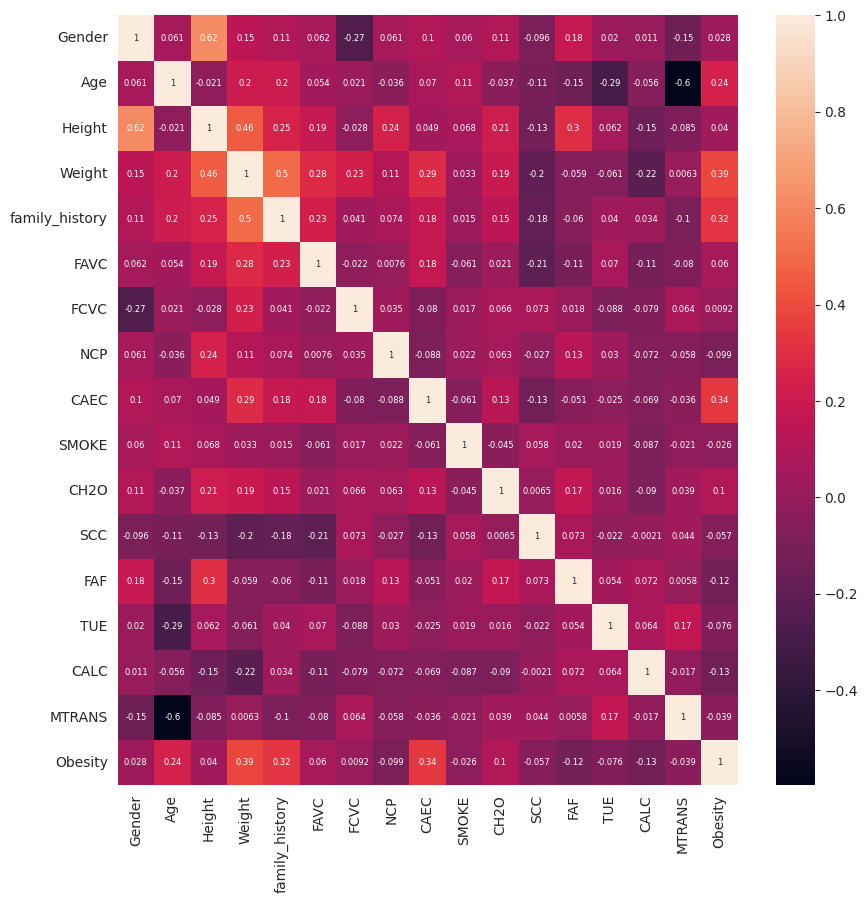

In [345]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True) , annot = True, annot_kws = {"size":6})

<Axes: xlabel='Gender', ylabel='count'>

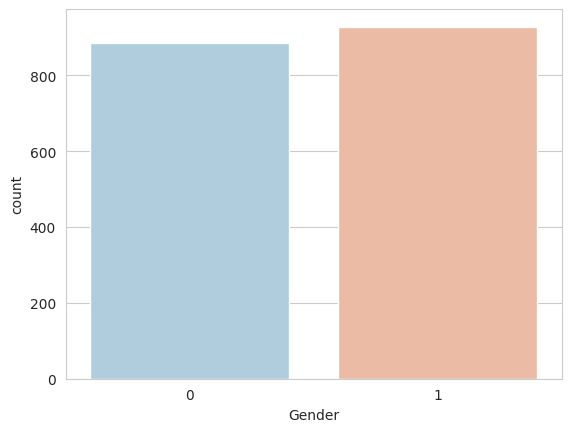

In [346]:
sns.set_style('whitegrid')
sns.countplot(x = 'Gender', data = df, palette = 'RdBu_r')

<Axes: xlabel='Obesity', ylabel='count'>

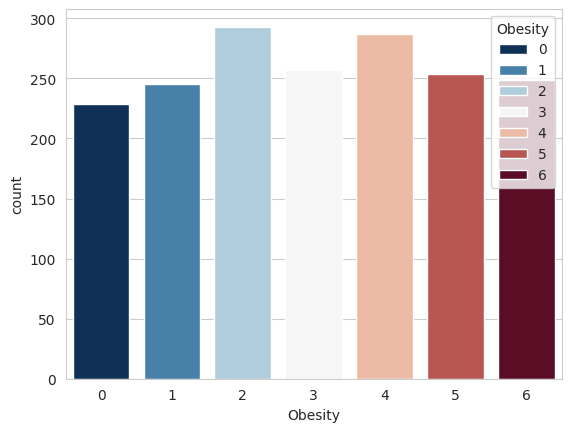

In [347]:
sns.set_style('whitegrid')
sns.countplot(x = 'Obesity', hue = 'Obesity', data = df, palette = 'RdBu_r')

<Axes: xlabel='Obesity', ylabel='count'>

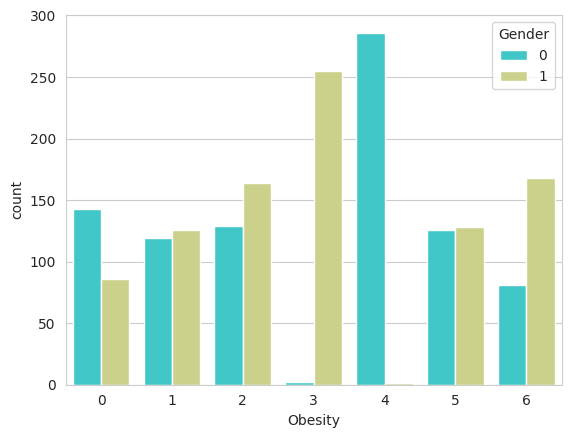

In [348]:
sns.set_style('whitegrid')
sns.countplot(x = 'Obesity', hue = 'Gender', data = df, palette = 'rainbow')

<Axes: xlabel='Obesity', ylabel='Age'>

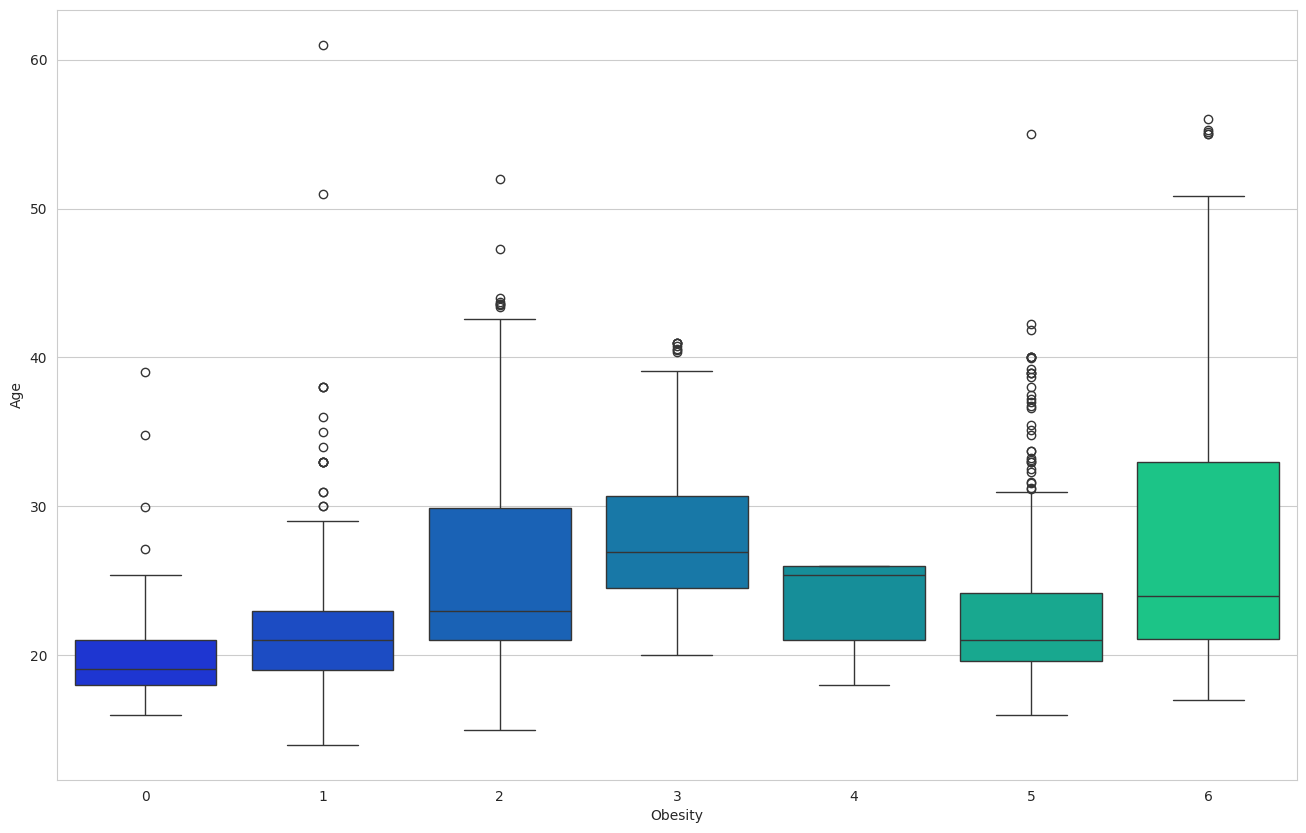

In [349]:
plt.figure(figsize = (16, 10))
sns.boxplot(x = 'Obesity', y = 'Age', data = df, palette = 'winter')

In [350]:
#replacing negative values with mean
# column_averages = df.where(df > 0).mean()
# df = df.mask(df < 0, column_averages, axis=1)
# negative_rows = df[(df < 0).any(axis=1)]
# print(negative_rows)

In [351]:
# mean_age = df[df['Age'] > 0]['Age'].mean()
# df['Age'] = df['Age'].apply(lambda x: x if x >= 0 else mean_age)

In [352]:
# mean = df[df['Height'] > 0]['Height'].mean()
# df['Height'] = df['Height'].apply(lambda x: x if x >= 0 else mean)

In [353]:
# mean = df[df['Weight'] > 0]['Weight'].mean()
# df['Weight'] = df['Weight'].apply(lambda x: x if x >= 0 else mean)

In [354]:
# mean = df[df['FAVC'] > 0]['FAVC'].mean()
# df['FAVC'] = df['FAVC'].apply(lambda x: x if x >= 0 else mean)

In [355]:
# mean = df[df['NCP'] > 0]['NCP'].mean()
# df['NCP'] = df['NCP'].apply(lambda x: x if x >= 0 else mean)

In [356]:
# mean = df[df['CH2O'] > 0]['CH2O'].mean()
# df['CH2O'] = df['CH2O'].apply(lambda x: x if x >= 0 else mean)

In [357]:
# mean = df[df['FAF'] > 0]['FAF'].mean()
# df['FAF'] = df['FAF'].apply(lambda x: x if x >= 0 else mean)

In [358]:
# mean = df[df['TUE'] > 0]['TUE'].mean()
# df['TUE'] = df['TUE'].apply(lambda x: x if x >= 0 else mean)

In [359]:
# negative_rows = df[(df < 0).any(axis=1)]
# print(negative_rows)

In [360]:
x=df.drop(['Obesity'],axis=1)
y=df['Obesity']

In [361]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [362]:
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [363]:
#scaled

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [364]:
#scaled

from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print("\nClassification Report LogisticRegression :\n",classification_report(y_test,y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print()
print(y_pred)


Classification Report LogisticRegression :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        74
           1       0.75      0.66      0.70        59
           2       0.92      0.93      0.92        94
           3       0.97      0.92      0.94        84
           4       0.98      1.00      0.99        80
           5       0.76      0.69      0.72        77
           6       0.77      0.82      0.79        77

    accuracy                           0.87       545
   macro avg       0.86      0.86      0.86       545
weighted avg       0.86      0.87      0.86       545

Accuracy Score:
0.8660550458715597

[6 3 0 6 6 4 6 2 6 4 0 2 2 4 6 2 0 3 2 2 2 0 4 5 1 2 1 2 6 4 3 0 3 4 5 6 5
 4 0 3 6 6 1 3 4 0 5 6 0 3 0 6 5 3 5 1 5 5 5 1 6 4 6 6 4 0 2 6 0 1 3 6 5 3
 0 2 6 2 6 5 3 2 1 6 2 5 4 2 5 0 6 1 5 0 1 4 0 2 2 5 5 6 1 3 6 3 0 0 2 2 0
 3 4 6 4 1 4 3 0 1 4 5 6 3 6 3 0 1 0 5 0 3 0 3 4 3 0 6 4 2 6 2 0 4 5 2 0 5
 3 2 5 3 5 5 2 2 3 0 4

In [365]:
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print("\nClassification Report LogisticRegression :\n",classification_report(y_test,y_pred))
# print('Accuracy Score:')
# print(accuracy_score(y_test, y_pred))

# print(y_pred)

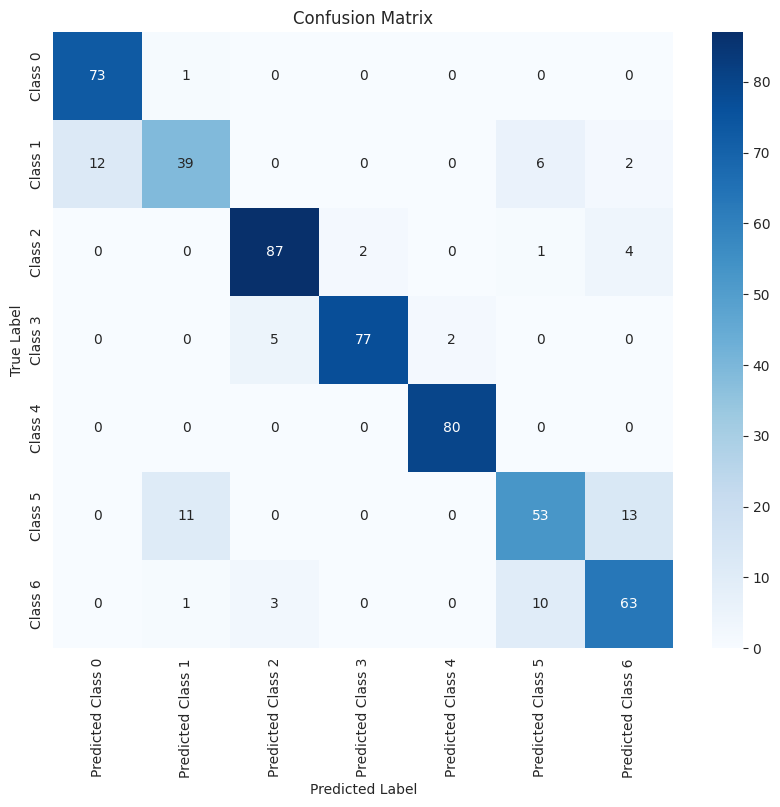

,Predicted Class 0,Predicted Class 1,Predicted Class 2,Predicted Class 3,Predicted Class 4,Predicted Class 5,Predicted Class 6
Class 0,73,1,0,0,0,0,0
Class 1,12,39,0,0,0,6,2
Class 2,0,0,87,2,0,1,4
Class 3,0,0,5,77,2,0,0
Class 4,0,0,0,0,80,0,0
Class 5,0,11,0,0,0,53,13
Class 6,0,1,3,0,0,10,63


In [366]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
confusion_df = pd.DataFrame(cm,
             columns = ["Predicted Class " + str(class_name) for class_name in range(7)],
             index = ["Class " + str(class_name) for class_name in range(7)])

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

confusion_df